# *Part 1*

1. To scrape the Wikipedia page to get the table of Toronto Neighborhoods and Postal Code

2. Cleaning the data

### **1. Importing all the required libraries**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('All Libraries downloaded and imported.')

All Libraries downloaded and imported.


## **2. Scraping Wikipedia page**

In [2]:
#setting up the url

wiki_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

#### Method 1: Using Pandas

In [3]:
df = pd.read_html(wiki_url) 
df = df[0] #returns a list of table. We choose the first table from the list

df

Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
7           M8A      Not assigned   
8           M9A         Etobicoke   
9           M1B       Scarborough   
10          M2B      Not assigned   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
15          M7B      Not assigned   
16          M8B      Not assigned   
17          M9B         Etobicoke   
18          M1C       Scarborough   
19          M2C      Not assigned   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
24          M7C      Not assigned   
25          M8C      Not assigned   
26          M9C         Etobicoke   
27          M1E       Scarborough   
28          M2E      Not assigned   
29          M3E      Not assigned   
30          M4E      East Toronto   
31          M5E  Downtown Toronto   
32          M6E              York   
33          M7E      Not assigned   
34          M8E      Not assigned   
35          M9E      Not assigned   
36          M1G       Scarborough   
37          M2G      Not assigned   
38          M3G      Not assigned   
39          M4G         East York   
40          M5G  Downtown Toronto   
41          M6G  Downtown Toronto   
42          M7G      Not assigned   
43          M8G      Not assigned   
44          M9G      Not assigned   
45          M1H       Scarborough   
46          M2H        North York   
47          M3H        North York   
48          M4H         East York   
49          M5H  Downtown Toronto   
50          M6H      West Toronto   
51          M7H      Not assigned   
52          M8H      Not assigned   
53          M9H      Not assigned   
54          M1J       Scarborough   
55          M2J        North York   
56          M3J        North York   
57          M4J         East York   
58          M5J  Downtown Toronto   
59          M6J      West Toronto   
60          M7J      Not assigned   
61          M8J      Not assigned   
62          M9J      Not assigned   
63          M1K       Scarborough   
64          M2K        North York   
65          M3K        North York   
66          M4K      East Toronto   
67          M5K  Downtown Toronto   
68          M6K      West Toronto   
69          M7K      Not assigned   
70          M8K      Not assigned   
71          M9K      Not assigned   
72          M1L       Scarborough   
73          M2L        North York   
74          M3L        North York   
75          M4L      East Toronto   
76          M5L  Downtown Toronto   
77          M6L        North York   
78          M7L      Not assigned   
79          M8L      Not assigned   
80          M9L        North York   
81          M1M       Scarborough   
82          M2M        North York   
83          M3M        North York   
84          M4M      East Toronto   
85          M5M        North York   
86          M6M              York   
87          M7M      Not assigned   
88          M8M      Not assigned   
89          M9M        North York   
90          M1N       Scarborough   
91          M2N        North York   
92          M3N        North York   
93          M4N   Central Toronto   
94          M5N   Central Toronto   
95          M6N              York   
96          M7N      Not assigned   
97          M8N      Not assigned   
98          M9N              York   
99          M1P       Scarborough   
100         M2P        North York   
101         M3P      Not assigned   
102         M4P   Central Toronto   
103         M5P   Central Toronto   
104         M6P      West Toronto   
105         M7P      Not assigned   
106         M8P      Not assigned   
107     

In [4]:
df['Postal Code'].unique()

array(['M1A', 'M2A', 'M3A', 'M4A', 'M5A', 'M6A', 'M7A', 'M8A', 'M9A',
       'M1B', 'M2B', 'M3B', 'M4B', 'M5B', 'M6B', 'M7B', 'M8B', 'M9B',
       'M1C', 'M2C', 'M3C', 'M4C', 'M5C', 'M6C', 'M7C', 'M8C', 'M9C',
       'M1E', 'M2E', 'M3E', 'M4E', 'M5E', 'M6E', 'M7E', 'M8E', 'M9E',
       'M1G', 'M2G', 'M3G', 'M4G', 'M5G', 'M6G', 'M7G', 'M8G', 'M9G',
       'M1H', 'M2H', 'M3H', 'M4H', 'M5H', 'M6H', 'M7H', 'M8H', 'M9H',
       'M1J', 'M2J', 'M3J', 'M4J', 'M5J', 'M6J', 'M7J', 'M8J', 'M9J',
       'M1K', 'M2K', 'M3K', 'M4K', 'M5K', 'M6K', 'M7K', 'M8K', 'M9K',
       'M1L', 'M2L', 'M3L', 'M4L', 'M5L', 'M6L', 'M7L', 'M8L', 'M9L',
       'M1M', 'M2M', 'M3M', 'M4M', 'M5M', 'M6M', 'M7M', 'M8M', 'M9M',
       'M1N', 'M2N', 'M3N', 'M4N', 'M5N', 'M6N', 'M7N', 'M8N', 'M9N',
       'M1P', 'M2P', 'M3P', 'M4P', 'M5P', 'M6P', 'M7P', 'M8P', 'M9P',
       'M1R', 'M2R', 'M3R', 'M4R', 'M5R', 'M6R', 'M7R', 'M8R', 'M9R',
       'M1S', 'M2S', 'M3S', 'M4S', 'M5S', 'M6S', 'M7S', 'M8S', 'M9S',
       'M1T', 'M2T',

#### Method 2: Using BeautifulSoup

In [5]:
#Get request

res = requests.get(wiki_url).text

In [6]:
#setting up a Beautiful Soup object
from bs4 import BeautifulSoup

soup = BeautifulSoup(res, 'html.parser')

In [7]:
#to find the data within the html text

list_table = soup.find('table',{'class':'wikitable sortable'})

#transforming the table into a dataframe

df= pd.read_html(str(list_table))

df = df[0]
df.head()

Postal Code           Borough               Neighborhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

## 3. Drop rows with Borough value 'Not assigned'

In [8]:
df = df[df['Borough'] !='Not assigned'].reset_index(drop=True)
df

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                          Neighborhood  
0                                            Parkwoods  
1                                     Vic

## 4. Check for missing values

In [9]:
#Checking missing values

df.isnull().sum()

Postal Code     0
Borough         0
Neighborhood    0
dtype: int64

In [10]:
#renaming the df to be relevant

toronto_df = df

## 5. Create a new DataFrame to display according to the requirement

In [11]:
# creating a new show dataframe to dispaly according to the question

column_names = ["Postal Code", "Borough", "Neighborhood"]
show_df = pd.DataFrame(columns=column_names)

show_list = ["M5G", "M2H", "M4B", "M1J", "M4G", "M4M", "M1R", "M9V", "M9L", "M5V", "M1B", "M5A"]

for postalcode in show_list:
    show_df = show_df.append(df[df["Postal Code"]==postalcode], ignore_index=True)
    
show_df

Postal Code           Borough  \
0          M5G  Downtown Toronto   
1          M2H        North York   
2          M4B         East York   
3          M1J       Scarborough   
4          M4G         East York   
5          M4M      East Toronto   
6          M1R       Scarborough   
7          M9V         Etobicoke   
8          M9L        North York   
9          M5V  Downtown Toronto   
10         M1B       Scarborough   
11         M5A  Downtown Toronto   

                                         Neighborhood  
0                                  Central Bay Street  
1                                   Hillcrest Village  
2                     Parkview Hill, Woodbine Gardens  
3                                 Scarborough Village  
4                                             Leaside  
5                                     Studio District  
6                                   Wexford, Maryvale  
7   South Steeles, Silverstone, Humbergate, Jamest...  
8                                       Humber Summit  
9   CN Tower, King and Spadina, Railway Lands, Har...  
10                                     Malvern, Rouge  
11                          Regent Park, Harbourfront

In [12]:
#shape of the original dataframe

print ("In Toronto, there are {} Postal codes and {} Boroughs".format(toronto_df.shape[0],len(toronto_df['Borough'].unique())))
print ('')
print ('Shape of the toronto df is: ', toronto_df.shape)

In Toronto, there are 103 Postal codes and 10 Boroughs

Shape of the toronto df is:  (103, 3)


# Part 2

1. To get the latitude and the longitude coordinates of each neighborhood by using Geospatial_data.csv

In [13]:
# load the coordinates from the downloaded csv file
coordinates = pd.read_csv("Geospatial_Coordinates.csv")
coordinates.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [14]:
#merge two table on the column "Postal Code"
toronto_df = toronto_df.merge(coordinates, on="Postal Code", how="left")
toronto_df.head()

Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

## Display the dataframe

In [15]:
# create a new show dataframe

column_names = ["Postal Code", "Borough", "Neighborhood", "Latitude", "Longitude"]
show2_df = pd.DataFrame(columns=column_names)

show2_list = ["M5G", "M2H", "M4B", "M1J", "M4G", "M4M", "M1R", "M9V", "M9L", "M5V", "M1B", "M5A"]

for postalcode in show2_list:
    show2_df = show2_df.append(toronto_df[toronto_df["Postal Code"]==postalcode], ignore_index=True)
    
show2_df

Postal Code           Borough  \
0          M5G  Downtown Toronto   
1          M2H        North York   
2          M4B         East York   
3          M1J       Scarborough   
4          M4G         East York   
5          M4M      East Toronto   
6          M1R       Scarborough   
7          M9V         Etobicoke   
8          M9L        North York   
9          M5V  Downtown Toronto   
10         M1B       Scarborough   
11         M5A  Downtown Toronto   

                                         Neighborhood   Latitude  Longitude  
0                                  Central Bay Street  43.657952 -79.387383  
1                                   Hillcrest Village  43.803762 -79.363452  
2                     Parkview Hill, Woodbine Gardens  43.706397 -79.309937  
3                                 Scarborough Village  43.744734 -79.239476  
4                                             Leaside  43.709060 -79.363452  
5                                     Studio District  43.659526 -79.340923  
6                                   Wexford, Maryvale  43.750072 -79.295849  
7   South Steeles, Silverstone, Humbergate, Jamest...  43.739416 -79.588437  
8                                       Humber Summit  43.756303 -79.565963  
9   CN Tower, King and Spadina, Railway Lands, Har...  43.628947 -79.394420  
10                                     Malvern, Rouge  43.806686 -79.194353  
11                          Regent Park, Harbourfront  43.654260 -79.360636

# Part 3

1. To explore and cluster the neighborhoods in Toronto

## 1. Use geopy to get the location coordinates of Toronto

In [16]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent='Tor_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print ("The coordinates of Toronto are {}, {}.".format(latitude,longitude))

The coordinates of Toronto are 43.6534817, -79.3839347.


## 2. Creating a map with the neighborhoods superimposed

In [17]:
#using latitude and longitude from previous step

tor_map = folium.Map(location=[latitude,longitude], zoom_start=12)

for lat,lng,borough,neighborhood,p_code in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Borough'], toronto_df['Neighborhood'], toronto_df["Postal Code"]):
    label = 'Neighborhood: {},\nBorough: {},\nPostal Code: {}'.format(neighborhood, borough, p_code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng],
                       radius = 5,
                       popup = label,
                       color = 'red',
                       fill = True,
                       fill_color = 'OrRd',
                       fill_opacity = 0.6,
                       parse_html=False).add_to(tor_map)
tor_map

## *3. Selecting limited number of neighborhoods*

In [18]:
#Let's see what borough's we have
print (toronto_df['Borough'].unique())

['North York' 'Downtown Toronto' 'Etobicoke' 'Scarborough' 'East York'
 'York' 'East Toronto' 'West Toronto' 'Central Toronto' 'Mississauga']


In [19]:
#let's choose to analyze the boroughs outside of Toronto city. i.e. the one's that do not have 'Toronto' in their name

borough_list = toronto_df['Borough'].unique()

tor_outskirts_list = []

for borough in borough_list:
    if 'toronto' not in borough.lower():
        tor_outskirts_list.append(borough)

print ("The Boroughs we will be analyzing are: ",tor_outskirts_list)

The Boroughs we will be analyzing are:  ['North York', 'Etobicoke', 'Scarborough', 'East York', 'York', 'Mississauga']


In [20]:
#creating a new dataframe with the boroughs we chose to analyze

df_new = toronto_df[toronto_df['Borough'].isin(tor_outskirts_list)].reset_index(drop=True)

df_new.head()

Postal Code      Borough                             Neighborhood  \
0         M3A   North York                                Parkwoods   
1         M4A   North York                         Victoria Village   
2         M6A   North York         Lawrence Manor, Lawrence Heights   
3         M9A    Etobicoke  Islington Avenue, Humber Valley Village   
4         M1B  Scarborough                           Malvern, Rouge   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.718518 -79.464763  
3  43.667856 -79.532242  
4  43.806686 -79.194353

In [21]:
#checking if the new df is correct

print (df_new.shape)
print (df_new['Borough'].unique())

(64, 5)
['North York' 'Etobicoke' 'Scarborough' 'East York' 'York' 'Mississauga']


In [22]:
#creating a map of Toronto with only the required boroughs

tor_map = folium.Map(location=[latitude,longitude], zoom_start=11)

for lat,lng,borough,neigh,p_code in zip(df_new['Latitude'],df_new['Longitude'],df_new['Borough'], df_new['Neighborhood'], df_new["Postal Code"]):
    label = '{},\t Borough: {},\t Postal Code: {}'.format(neigh,borough,p_code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng],
                       radius = 5,
                       popup = label,
                       color = 'red',
                       fill = True,
                       fill_color = 'OrRd',
                       fill_opacity = 0.6,
                       parse_html=False).add_to(tor_map)
tor_map

## 4. Foursquare API credentials

In [23]:
# @hidden_cell

CLIENT_ID = 'BHXTSAXJF2IDFXWDDLVF1OTJSN2PGMJX04KOT1B50P03Y4GS' # your Foursquare ID
CLIENT_SECRET = 'YGLYKVHMTZ4JLVFRIOA1ANXLOGPZFFMYA0EYOYR5LGOIHN4E' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentials-')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentials-
CLIENT_ID: BHXTSAXJF2IDFXWDDLVF1OTJSN2PGMJX04KOT1B50P03Y4GS
CLIENT_SECRET:YGLYKVHMTZ4JLVFRIOA1ANXLOGPZFFMYA0EYOYR5LGOIHN4E


## 5. Now, we get the top 100 venues within a radius of 500m for the first Postal Code

In [24]:
#for the first postal code

limit = 100
radius = 500
lat = df_new.loc[0,'Latitude'] #latitude of first item in the df
lng = df_new.loc[0, 'Longitude'] #longitude of first item in the df

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,limit)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=BHXTSAXJF2IDFXWDDLVF1OTJSN2PGMJX04KOT1B50P03Y4GS&client_secret=YGLYKVHMTZ4JLVFRIOA1ANXLOGPZFFMYA0EYOYR5LGOIHN4E&v=20180605&ll=43.7532586,-79.3296565&radius=500&limit=100'

In [25]:
#Get request

result = requests.get(url).json()
result

{'meta': {'code': 200, 'requestId': '5edff3898bc50045a287a6cb'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 43.757758604500005,
    'lng': -79.32343823984928},
   'sw': {'lat': 43.7487585955, 'lng': -79.33587476015072}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLngs': 

In [26]:
venue = result['response']['groups'][0]['items']
nearby_venue = pd.json_normalize(venue)

nearby_venue

referralId  reasons.count  \
0  e-0-4e8d9dcdd5fbbbb6b3003c7b-0              0   
1  e-0-4cb11e2075ebb60cd1c4caad-1              0   
2  e-0-5921cc82e96d0c63d980640c-2              0   

                                       reasons.items  \
0  [{'summary': 'This spot is popular', 'type': '...   
1  [{'summary': 'This spot is popular', 'type': '...   
2  [{'summary': 'This spot is popular', 'type': '...   

                   venue.id                         venue.name  \
0  4e8d9dcdd5fbbbb6b3003c7b                    Brookbanks Park   
1  4cb11e2075ebb60cd1c4caad                      Variety Store   
2  5921cc82e96d0c63d980640c  Corrosion Service Company Limited   

  venue.location.address  venue.location.lat  venue.location.lng  \
0                Toronto           43.751976          -79.332140   
1   29 Valley Woods Road           43.751974          -79.333114   
2    9-280 Hillmount Rd.           43.752432          -79.334661   

                       venue.location.labeledLatLngs  venue.location.distance  \
0  [{'label': 'display', 'lat': 43.75197604605557...                      245   
1  [{'label': 'display', 'lat': 43.75197441585782...                      312   
2  [{'label': 'display', 'lat': 43.75243208667859...                      412   

  venue.location.cc venue.location.city venue.location.state  \
0                CA             Toronto                   ON   
1                CA             Toronto                   ON   
2                CA             Markham                   ON   

  venue.location.country                    venue.location.formattedAddress  \
0                 Canada                      [Toronto, Toronto ON, Canada]   
1                 Canada         [29 Valley Woods Road, Toronto ON, Canada]   
2                 Canada  [9-280 Hillmount Rd., Markham ON L6C 3A1, Canada]   

                                    venue.categories  venue.photos.count  \
0  [{'id': '4bf58dd8d48988d163941735', 'name': 'P...                   0   
1  [{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...                   0   
2  [{'id': '5454144b498ec1f095bff2f2', 'name': 'C...                   0   

  venue.photos.groups venue.location.postalCode  
0                  []                       NaN  
1                  []                       NaN  
2                  []                   L6C 3A1

In [27]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venue = nearby_venue.loc[:, filtered_columns]

nearby_venue

venue.name  \
0                    Brookbanks Park   
1                      Variety Store   
2  Corrosion Service Company Limited   

                                    venue.categories  venue.location.lat  \
0  [{'id': '4bf58dd8d48988d163941735', 'name': 'P...           43.751976   
1  [{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...           43.751974   
2  [{'id': '5454144b498ec1f095bff2f2', 'name': 'C...           43.752432   

   venue.location.lng  
0          -79.332140  
1          -79.333114  
2          -79.334661

In [28]:
#checking how the venue.categories looks like, so we can extract the name from it
print (nearby_venue['venue.categories'][0])

[{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}]


In [29]:
#creating a function to extract the category type

def get_category(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
#creating a function to get the nearby venues within a radius of 500m

def getNearbyVenues(postal_codes, boroughs, neighborhoods, latitudes, longitudes, radius=500):
    
    venues_list=[]
    
    for p_code, borough, neigh, lat, lng in zip(postal_codes, boroughs, neighborhoods, latitudes, longitudes):
        print(p_code,'\t', neigh)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            p_code,
            borough,
            neigh,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code','Borough','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue Name', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print ("All venues extracted and sorted")
    
    return(nearby_venues)

In [31]:
search_query = 'Tim Hortons'
radius = 1000
latitude = df_new.Latitude[3] 
print (latitude)
longitude = df_new.Longitude[3]
print (longitude)
LIMIT = 100

43.6678556
-79.53224240000002


In [32]:
tor_venues = getNearbyVenues(postal_codes= df_new['Postal Code'],
                            boroughs= df_new['Borough'],
                            neighborhoods= df_new['Neighborhood'],
                            latitudes= df_new['Latitude'],
                            longitudes= df_new['Longitude'])

M3A 	 Parkwoods
M4A 	 Victoria Village
M6A 	 Lawrence Manor, Lawrence Heights
M9A 	 Islington Avenue, Humber Valley Village
M1B 	 Malvern, Rouge
M3B 	 Don Mills
M4B 	 Parkview Hill, Woodbine Gardens
M6B 	 Glencairn
M9B 	 West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
M1C 	 Rouge Hill, Port Union, Highland Creek
M3C 	 Don Mills
M4C 	 Woodbine Heights
M6C 	 Humewood-Cedarvale
M9C 	 Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
M1E 	 Guildwood, Morningside, West Hill
M6E 	 Caledonia-Fairbanks
M1G 	 Woburn
M4G 	 Leaside
M1H 	 Cedarbrae
M2H 	 Hillcrest Village
M3H 	 Bathurst Manor, Wilson Heights, Downsview North
M4H 	 Thorncliffe Park
M1J 	 Scarborough Village
M2J 	 Fairview, Henry Farm, Oriole
M3J 	 Northwood Park, York University
M4J 	 East Toronto, Broadview North (Old East York)
M1K 	 Kennedy Park, Ionview, East Birchmount Park
M2K 	 Bayview Village
M3K 	 Downsview
M1L 	 Golden Mile, Clairlea, Oakridge
M2L 	 York Mills, Silver Hills
M3L 	 Downsvi

In [33]:
tor_venues.shape

(514, 9)

In [34]:
tor_venues.head()

Postal Code     Borough      Neighborhood  Neighborhood Latitude  \
0         M3A  North York         Parkwoods              43.753259   
1         M3A  North York         Parkwoods              43.753259   
2         M3A  North York         Parkwoods              43.753259   
3         M4A  North York  Victoria Village              43.725882   
4         M4A  North York  Victoria Village              43.725882   

   Neighborhood Longitude                         Venue Name  Venue Latitude  \
0              -79.329656                    Brookbanks Park       43.751976   
1              -79.329656                      Variety Store       43.751974   
2              -79.329656  Corrosion Service Company Limited       43.752432   
3              -79.315572             Victoria Village Arena       43.723481   
4              -79.315572                        Tim Hortons       43.725517   

   Venue Longitude              Venue Category  
0       -79.332140                        Park  
1       -79.333114           Food & Drink Shop  
2       -79.334661  Construction & Landscaping  
3       -79.315635                Hockey Arena  
4       -79.313103                 Coffee Shop

In [35]:
#checking how many venues there are for each postal code

tor_venues.groupby(['Neighborhood','Postal Code']).count()

Borough  \
Neighborhood                                       Postal Code            
Agincourt                                          M1S                5   
Alderwood, Long Branch                             M8W               10   
Bathurst Manor, Wilson Heights, Downsview North    M3H               23   
Bayview Village                                    M2K                4   
Bedford Park, Lawrence Manor East                  M5M               25   
Birch Cliff, Cliffside West                        M1N                4   
Caledonia-Fairbanks                                M6E                4   
Canada Post Gateway Processing Centre              M7R               13   
Cedarbrae                                          M1H                8   
Clarks Corners, Tam O'Shanter, Sullivan            M1T               12   
Cliffside, Cliffcrest, Scarborough Village West    M1M                2   
Del Ray, Mount Dennis, Keelsdale and Silverthorn   M6M                4   
Don Mills                                          M3B                4   
                                                   M3C               21   
Dorset Park, Wexford Heights, Scarborough Town ... M1P                5   
Downsview                                          M3K                4   
                                                   M3L                5   
                                                   M3M                3   
                                                   M3N                4   
East Toronto, Broadview North (Old East York)      M4J                4   
Eringate, Bloordale Gardens, Old Burnhamthorpe,... M9C                7   
Fairview, Henry Farm, Oriole                       M2J               58   
Glencairn                                          M6B                4   
Golden Mile, Clairlea, Oakridge                    M1L                9   
Guildwood, Morningside, West Hill                  M1E                7   
Hillcrest Village                                  M2H                4   
Humber Summit                                      M9L                1   
Humberlea, Emery                                   M9M                1   
Humewood-Cedarvale                                 M6C                5   
Kennedy Park, Ionview, East Birchmount Park        M1K                4   
Kingsview Village, St. Phillips, Martin Grove G... M9R                4   
Lawrence Manor, Lawrence Heights                   M6A               16   
Leaside                                            M4G               33   
Malvern, Rouge                                     M1B                2   
Milliken, Agincourt North, Steeles East, L'Amor... M1V                3   
Mimico NW, The Queensway West, South of Bloor, ... M8Z               13   
New Toronto, Mimico South, Humber Bay Shores       M8V               13   
North Park, Maple Leaf Park, Upwood Park           M6L                5   
Northwest, West Humber - Clairville                M9W                3   
Northwood Park, York University                    M3J                7   
Old Mill South, King's Mill Park, Sunnylea, Hum... M8Y                3   
Parkview Hill, Woodbine Gardens                    M4B               12   
Parkwoods                                          M3A                3   
Rouge Hill, Port Union, Highland Creek             M1C                3   
Runnymede, The Junction North                      M6N                4   
Scarborough Village                                M1J                3   
South Steeles, Silverstone, Humbergate, Jamesto... M9V                9   
Steeles West, L'Amoreaux West                      M1W               10   
The Kingsway, Montgomery Road, Old Mill North      M8X                2   
Thorncliffe Park                                   M4H               22   
Victoria Village                                   M4A                6   
Westmount                                          M9P                6   
Weston        

In [36]:
#checking the no. of unique venue categories

print ('There are {} categories.'.format(len(tor_venues['Venue Category'].unique())))

There are 146 categories.


In [37]:
#first 50 categories listed
print (tor_venues['Venue Category'].unique()[0:100])

['Park' 'Food & Drink Shop' 'Construction & Landscaping' 'Hockey Arena'
 'Coffee Shop' 'Portuguese Restaurant' 'French Restaurant' 'Intersection'
 'Pizza Place' 'Boutique' 'Furniture / Home Store' 'Vietnamese Restaurant'
 'Clothing Store' 'Accessories Store' 'Event Space' "Women's Store"
 'Gift Shop' 'Miscellaneous Shop' 'Fast Food Restaurant' 'Print Shop'
 'Caribbean Restaurant' 'Café' 'Gym / Fitness Center'
 'Japanese Restaurant' 'Gastropub' 'Pharmacy' 'Bank' 'Breakfast Spot'
 'Pet Store' 'Athletics & Sports' 'Pub' 'Golf Course' 'Home Service' 'Bar'
 'Italian Restaurant' 'Gym' 'Discount Store' 'Restaurant'
 'Sporting Goods Shop' 'Bike Shop' 'Art Gallery' 'Beer Store'
 'Supermarket' 'Asian Restaurant' 'Dim Sum Restaurant' 'Sandwich Place'
 'Chinese Restaurant' 'Skating Rink' 'Curling Ice' 'Bus Stop'
 'Dance Studio' 'Spa' 'Field' 'Trail' 'Playground' 'Dog Run'
 'Liquor Store' 'Shopping Plaza' 'Electronics Store' 'Mexican Restaurant'
 'Rental Car Location' 'Medical Center' 'Pool' 'Korea

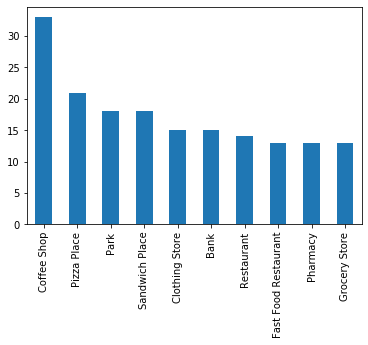

In [38]:
#visualising the top 10 occuring venues

tor_venues['Venue Category'].value_counts()[:10].plot(kind='bar')

## 5. Let's checkout each Neighborhood

In [39]:
#one-hot encoding

tor_onehot = pd.get_dummies(tor_venues['Venue Category'])

#adding back columns

tor_onehot['Postal Code'] = tor_venues['Postal Code']
tor_onehot['Neighborhood'] = tor_venues['Neighborhood']
tor_onehot['Borough'] = tor_venues['Borough']

#moving the columns infront
fixed_columns = list(tor_onehot.columns[-3:]) + list(tor_onehot.columns[:-3])
tor_onehot = tor_onehot[fixed_columns]

print (tor_onehot.shape)
tor_onehot.head()

(514, 149)


Postal Code      Neighborhood     Borough  Accessories Store  Airport  \
0         M3A         Parkwoods  North York                  0        0   
1         M3A         Parkwoods  North York                  0        0   
2         M3A         Parkwoods  North York                  0        0   
3         M4A  Victoria Village  North York                  0        0   
4         M4A  Victoria Village  North York                  0        0   

   American Restaurant  Art Gallery  Arts & Crafts Store  Asian Restaurant  \
0                    0            0                    0                 0   
1                    0            0                    0                 0   
2                    0            0                    0                 0   
3                    0            0                    0                 0   
4                    0            0                    0                 0   

   Athletics & Sports  Auto Garage  Bagel Shop  Bakery  Bank  Bar  \
0                   0            0           0       0     0    0   
1                   0            0           0       0     0    0   
2                   0            0           0       0     0    0   
3                   0            0           0       0     0    0   
4                   0            0           0       0     0    0   

   Baseball Field  Basketball Court  Beer Store  Bike Shop  Boutique  \
0               0                 0           0          0         0   
1               0                 0           0          0         0   
2               0                 0           0          0         0   
3               0                 0           0          0         0   
4               0                 0           0          0         0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Burger Joint  \
0               0        0            0                0             0   
1               0        0            0                0             0   
2               0        0            0                0             0   
3               0        0            0                0             0   
4               0        0            0                0             0   

   Burrito Place  Bus Line  Bus Station  Bus Stop  Business Service  Butcher  \
0              0         0            0         0                 0        0   
1              0         0            0         0                 0        0   
2              0         0            0         0                 0        0   
3              0         0            0         0                 0        0   
4              0         0            0         0                 0        0   

   Cafeteria  Café  Caribbean Restaurant  Chinese Restaurant  Chocolate Shop  \
0          0     0                     0                   0               0   
1          0     0                     0                   0               0   
2          0     0                     0                   0               0   
3          0     0                     0                   0               0   
4          0     0                     0                   0               0   

   Clothing Store  Coffee Shop  College Stadium  Comfort Food Restaurant  \
0               0            0                0                        0   
1               0            0                0                        0   
2               0            0                0                        0   
3               0            0                0                        0   
4               0            1                0                        0   

   Construction & Landscaping  Convenience Store  Cosmetics Shop  \
0                           0                  0               0   
1                           0                  0               0   
2                           1                  0               0   
3                           0                  0               0   
4                           0 

In [40]:
#grouping the rows by postal code and mean frequency

tor_grouped = tor_onehot.groupby(['Postal Code','Neighborhood','Borough']).mean().reset_index()

print (tor_grouped.shape)
tor_grouped.head()

(61, 149)


Postal Code                            Neighborhood      Borough  \
0         M1B                          Malvern, Rouge  Scarborough   
1         M1C  Rouge Hill, Port Union, Highland Creek  Scarborough   
2         M1E       Guildwood, Morningside, West Hill  Scarborough   
3         M1G                                  Woburn  Scarborough   
4         M1H                               Cedarbrae  Scarborough   

   Accessories Store  Airport  American Restaurant  Art Gallery  \
0                0.0      0.0                  0.0          0.0   
1                0.0      0.0                  0.0          0.0   
2                0.0      0.0                  0.0          0.0   
3                0.0      0.0                  0.0          0.0   
4                0.0      0.0                  0.0          0.0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                  0.0               0.0               0.000          0.0   
1                  0.0               0.0               0.000          0.0   
2                  0.0               0.0               0.000          0.0   
3                  0.0               0.0               0.000          0.0   
4                  0.0               0.0               0.125          0.0   

   Bagel Shop  Bakery      Bank       Bar  Baseball Field  Basketball Court  \
0         0.0   0.000  0.000000  0.000000             0.0               0.0   
1         0.0   0.000  0.000000  0.333333             0.0               0.0   
2         0.0   0.000  0.142857  0.000000             0.0               0.0   
3         0.0   0.000  0.000000  0.000000             0.0               0.0   
4         0.0   0.125  0.125000  0.000000             0.0               0.0   

   Beer Store  Bike Shop  Boutique  Breakfast Spot  Brewery  Bridal Shop  \
0         0.0        0.0       0.0        0.000000      0.0          0.0   
1         0.0        0.0       0.0        0.000000      0.0          0.0   
2         0.0        0.0       0.0        0.142857      0.0          0.0   
3         0.0        0.0       0.0        0.000000      0.0          0.0   
4         0.0        0.0       0.0        0.000000      0.0          0.0   

   Bubble Tea Shop  Burger Joint  Burrito Place  Bus Line  Bus Station  \
0              0.0           0.0            0.0       0.0          0.0   
1              0.0           0.0            0.0       0.0          0.0   
2              0.0           0.0            0.0       0.0          0.0   
3              0.0           0.0            0.0       0.0          0.0   
4              0.0           0.0            0.0       0.0          0.0   

   Bus Stop  Business Service  Butcher  Cafeteria  Café  Caribbean Restaurant  \
0       0.0               0.0      0.0        0.0   0.0                 0.000   
1       0.0               0.0      0.0        0.0   0.0                 0.000   
2       0.0               0.0      0.0        0.0   0.0                 0.000   
3       0.0               0.0      0.0        0.0   0.0                 0.000   
4       0.0               0.0      0.0        0.0   0.0                 0.125   

   Chinese Restaurant  Chocolate Shop  Clothing Store  Coffee Shop  \
0                 0.0             0.0             0.0          0.0   
1                 0.0             0.0             0.0          0.0   
2                 0.0             0.0             0.0          0.0   
3                 0.0             0.0             0.0          0.5   
4                 0.0             0.0             0.0          0.0   

   College Stadium  Comfort Food Restaurant  Construction & Landscaping  \
0              0.0                      0.0                         0.0   
1              0.0                      0.0                         0.0   
2              0.0                      0.0                         0.0   
3              0.0                      0.0                         0.0   
4              0.0                      0.0            

In [41]:
#Top 10 venues at each neighborhood
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

#create columns
columns = ['Borough', 'Postal Code', 'Neighborhood']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} most common venue'.format(ind+1,indicators[ind]))
    except:
        columns.append('{}th most common venue'.format(ind+1))
        
#new dataframe
tor_venues_sorted = pd.DataFrame(columns=columns)
tor_venues_sorted['Borough'] = tor_grouped['Borough']
tor_venues_sorted['Postal Code'] = tor_grouped['Postal Code']
tor_venues_sorted['Neighborhood'] = tor_grouped['Neighborhood']

for ind in np.arange(tor_grouped.shape[0]):
    row_categories = tor_grouped.iloc[ind, :].iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    tor_venues_sorted.iloc[ind, 3:] = row_categories_sorted.index.values[0:num_top_venues]
    
print (tor_venues_sorted.shape)
tor_venues_sorted.head()

(61, 13)


Borough Postal Code                            Neighborhood  \
0  Scarborough         M1B                          Malvern, Rouge   
1  Scarborough         M1C  Rouge Hill, Port Union, Highland Creek   
2  Scarborough         M1E       Guildwood, Morningside, West Hill   
3  Scarborough         M1G                                  Woburn   
4  Scarborough         M1H                               Cedarbrae   

  1st most common venue 2nd most common venue 3rd most common venue  \
0            Print Shop  Fast Food Restaurant           Yoga Studio   
1           Golf Course          Home Service                   Bar   
2        Breakfast Spot        Medical Center   Rental Car Location   
3           Coffee Shop     Korean Restaurant          Soccer Field   
4                Bakery      Hakka Restaurant    Athletics & Sports   

  4th most common venue 5th most common venue 6th most common venue  \
0      Department Store               Dog Run   Distribution Center   
1           Yoga Studio          Dessert Shop             Drugstore   
2    Mexican Restaurant          Intersection     Electronics Store   
3           Yoga Studio    Dim Sum Restaurant             Drugstore   
4           Gas Station       Thai Restaurant                  Bank   

  7th most common venue 8th most common venue 9th most common venue  \
0        Discount Store                 Diner    Dim Sum Restaurant   
1               Dog Run   Distribution Center        Discount Store   
2                  Bank           Yoga Studio                 Diner   
3               Dog Run   Distribution Center        Discount Store   
4  Caribbean Restaurant   Fried Chicken Joint          Dessert Shop   

  10th most common venue  
0           Dessert Shop  
1                  Diner  
2                Dog Run  
3                  Diner  
4              Drugstore

## 6. Cluster Neighborhoods

In [42]:
#setting number of clusters to 5
k = 5

tor_grouped_cluster = tor_grouped.drop(["Postal Code", "Borough", "Neighborhood"], 1)

#k-means
kmeans = KMeans(n_clusters=k, random_state=0).fit(tor_grouped_cluster)

#cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 2, 0, 0, 2, 0, 2, 0], dtype=int32)

In [43]:
#let's add these clusters to a new dataframe

tor_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#creating a copy of the original dataframe
tor_merged = df_new.copy()

#joining the two dataframes on Postal Code
tor_merged = tor_merged.join(tor_venues_sorted.drop(['Neighborhood', 'Borough'],axis = 1).set_index(['Postal Code']), on = 'Postal Code')

print (tor_merged.shape)
tor_merged.head()

(64, 16)


Postal Code      Borough                             Neighborhood  \
0         M3A   North York                                Parkwoods   
1         M4A   North York                         Victoria Village   
2         M6A   North York         Lawrence Manor, Lawrence Heights   
3         M9A    Etobicoke  Islington Avenue, Humber Valley Village   
4         M1B  Scarborough                           Malvern, Rouge   

    Latitude  Longitude  Cluster Labels       1st most common venue  \
0  43.753259 -79.329656             0.0  Construction & Landscaping   
1  43.725882 -79.315572             2.0                 Pizza Place   
2  43.718518 -79.464763             2.0              Clothing Store   
3  43.667856 -79.532242             NaN                         NaN   
4  43.806686 -79.194353             0.0                  Print Shop   

  2nd most common venue   3rd most common venue 4th most common venue  \
0     Food & Drink Shop                    Park          Dessert Shop   
1          Hockey Arena            Intersection     French Restaurant   
2     Accessories Store  Furniture / Home Store              Boutique   
3                   NaN                     NaN                   NaN   
4  Fast Food Restaurant             Yoga Studio      Department Store   

  5th most common venue  6th most common venue 7th most common venue  \
0               Dog Run    Distribution Center        Discount Store   
1           Coffee Shop  Portuguese Restaurant     Convenience Store   
2             Gift Shop            Event Space    Miscellaneous Shop   
3                   NaN                    NaN                   NaN   
4               Dog Run    Distribution Center        Discount Store   

  8th most common venue 9th most common venue 10th most common venue  
0                 Diner    Dim Sum Restaurant       Department Store  
1        Cosmetics Shop          Cupcake Shop            Curling Ice  
2           Coffee Shop         Women's Store  Vietnamese Restaurant  
3                   NaN                   NaN                    NaN  
4                 Diner    Dim Sum Restaurant           Dessert Shop

In [44]:
#sorting values by cluster labels

tor_merged.sort_values(['Cluster Labels'], inplace=True)
tor_merged.reset_index(drop=True)

Postal Code      Borough  \
0          M3A   North York   
1          M3K   North York   
2          M1L  Scarborough   
3          M2L   North York   
4          M3L   North York   
5          M8Y    Etobicoke   
6          M3M   North York   
7          M1N  Scarborough   
8          M6N         York   
9          M1P  Scarborough   
10         M9R    Etobicoke   
11         M1S  Scarborough   
12         M1T  Scarborough   
13         M1V  Scarborough   
14         M8V    Etobicoke   
15         M9V    Etobicoke   
16         M9W    Etobicoke   
17         M8X    Etobicoke   
18         M2K   North York   
19         M4J    East York   
20         M6L   North York   
21         M8Z    Etobicoke   
22         M6C         York   
23         M1J  Scarborough   
24         M1C  Scarborough   
25         M1E  Scarborough   
26         M4C    East York   
27         M4B    East York   
28         M3B   North York   
29         M6B   North York   
30         M1H  Scarborough   
31         M2H   North York   
32         M1B  Scarborough   
33         M6E         York   
34         M2M   North York   
35         M9N         York   
36         M2P   North York   
37         M1W  Scarborough   
38         M8W    Etobicoke   
39         M3C   North York   
40         M7R  Mississauga   
41         M2R   North York   
42         M1R  Scarborough   
43         M6A   North York   
44         M4A   North York   
45         M2J   North York   
46         M2N   North York   
47         M9C    Etobicoke   
48         M6M         York   
49         M5M   North York   
50         M1M  Scarborough   
51         M1G  Scarborough   
52         M4G    East York   
53         M3H   North York   
54         M1K  Scarborough   
55         M4H    East York   
56         M3J   North York   
57         M9P    Etobicoke   
58         M3N   North York   
59         M9L   North York   
60         M9M   North York   
61         M9A    Etobicoke   
62         M9B    Etobicoke   
63         M1X  Scarborough   

                                         Neighborhood   Latitude  Longitude  \
0                                           Parkwoods  43.753259 -79.329656   
1                                           Downsview  43.737473 -79.464763   
2                     Golden Mile, Clairlea, Oakridge  43.711112 -79.284577   
3                            York Mills, Silver Hills  43.757490 -79.374714   
4                                           Downsview  43.739015 -79.506944   
5   Old Mill South, King's Mill Park, Sunnylea, Hu...  43.636258 -79.498509   
6                                           Downsview  43.728496 -79.495697   
7                         Birch Cliff, Cliffside West  43.692657 -79.264848   
8                       Runnymede, The Junction North  43.673185 -79.487262   
9   Dorset Park, Wexford Heights, Scarborough Town...  43.757410 -79.273304   
10  Kingsview Village, St. Phillips, Martin Grove ...  43.688905 -79.554724   
11                                          Agincourt  43.794200 -79.262029   
12            Clarks Corners, Tam O'Shanter, Sullivan  43.781638 -79.304302   
13  Milliken, Agincourt North, Steeles East, L'Amo...  43.815252 -79.284577   
14       New Toronto, Mimico South, Humber Bay Shores  43.605647 -79.501321   
15  South Steeles, Silverstone, Humbergate, Jamest...  43.739416 -79.588437   
16                Northwest, West Humber - Clairville  43.706748 -79.594054   
17      The Kingsway, Montgomery Road, Old Mill North  43.653654 -79.506944   
18                                    Bayview Village  43.786947 -79.385975   
19      East Toronto, Broadview North (Old East York)  43.685347 -79.338106   
20           North Park, Maple Leaf Park, Upwood Park  43.713756 -79.490074   
21  Mimico NW, The Queensway West, South of Bloor,...  43.628841 -79.520999   
22                                 Humewood-Cedarvale  43.693781 -79.428191   
23                                Scarborough Village  43.744734 -79.239476   
24          

In [45]:
tor_merged = tor_merged.iloc[:60] #dropping neighborhoods where no venue's were returned

print (tor_merged.shape)

(60, 16)


In [46]:
tor_merged['Cluster Labels'] = tor_merged['Cluster Labels'].astype(int)
tor_merged.dtypes

Postal Code                object
Borough                    object
Neighborhood               object
Latitude                  float64
Longitude                 float64
Cluster Labels              int64
1st most common venue      object
2nd most common venue      object
3rd most common venue      object
4th most common venue      object
5th most common venue      object
6th most common venue      object
7th most common venue      object
8th most common venue      object
9th most common venue      object
10th most common venue     object
dtype: object

In [47]:
#visualisation 

tor_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i+x+(i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, p_code, boro, neigh, cluster in zip(tor_merged['Latitude'], tor_merged['Longitude'], tor_merged['Postal Code'], tor_merged['Borough'], tor_merged['Neighborhood'], tor_merged['Cluster Labels']):
    label = folium.Popup('{} ({}): {} - Cluster {}'.format(boro, p_code, neigh, cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(tor_map_clusters)
       
tor_map_clusters

In [48]:
tor_merged.reset_index()

index Postal Code      Borough  \
0       0         M3A   North York   
1      28         M3K   North York   
2      29         M1L  Scarborough   
3      30         M2L   North York   
4      31         M3L   North York   
5      62         M8Y    Etobicoke   
6      36         M3M   North York   
7      40         M1N  Scarborough   
8      43         M6N         York   
9      45         M1P  Scarborough   
10     51         M9R    Etobicoke   
11     52         M1S  Scarborough   
12     53         M1T  Scarborough   
13     54         M1V  Scarborough   
14     55         M8V    Etobicoke   
15     56         M9V    Etobicoke   
16     59         M9W    Etobicoke   
17     61         M8X    Etobicoke   
18     27         M2K   North York   
19     25         M4J    East York   
20     32         M6L   North York   
21     63         M8Z    Etobicoke   
22     12         M6C         York   
23     22         M1J  Scarborough   
24      9         M1C  Scarborough   
25     14         M1E  Scarborough   
26     11         M4C    East York   
27      6         M4B    East York   
28      5         M3B   North York   
29      7         M6B   North York   
30     18         M1H  Scarborough   
31     19         M2H   North York   
32      4         M1B  Scarborough   
33     15         M6E         York   
34     35         M2M   North York   
35     44         M9N         York   
36     46         M2P   North York   
37     57         M1W  Scarborough   
38     58         M8W    Etobicoke   
39     10         M3C   North York   
40     50         M7R  Mississauga   
41     49         M2R   North York   
42     48         M1R  Scarborough   
43      2         M6A   North York   
44      1         M4A   North York   
45     23         M2J   North York   
46     41         M2N   North York   
47     13         M9C    Etobicoke   
48     38         M6M         York   
49     37         M5M   North York   
50     34         M1M  Scarborough   
51     16         M1G  Scarborough   
52     17         M4G    East York   
53     20         M3H   North York   
54     26         M1K  Scarborough   
55     21         M4H    East York   
56     24         M3J   North York   
57     47         M9P    Etobicoke   
58     42         M3N   North York   
59     33         M9L   North York   

                                         Neighborhood   Latitude  Longitude  \
0                                           Parkwoods  43.753259 -79.329656   
1                                           Downsview  43.737473 -79.464763   
2                     Golden Mile, Clairlea, Oakridge  43.711112 -79.284577   
3                            York Mills, Silver Hills  43.757490 -79.374714   
4                                           Downsview  43.739015 -79.506944   
5   Old Mill South, King's Mill Park, Sunnylea, Hu...  43.636258 -79.498509   
6                                           Downsview  43.728496 -79.495697   
7                         Birch Cliff, Cliffside West  43.692657 -79.264848   
8                       Runnymede, The Junction North  43.673185 -79.487262   
9   Dorset Park, Wexford Heights, Scarborough Town...  43.757410 -79.273304   
10  Kingsview Village, St. Phillips, Martin Grove ...  43.688905 -79.554724   
11                                          Agincourt  43.794200 -79.262029   
12            Clarks Corners, Tam O'Shanter, Sullivan  43.781638 -79.304302   
13  Milliken, Agincourt North, Steeles East, L'Amo...  43.815252 -79.284577   
14       New Toronto, Mimico South, Humber Bay Shores  43.605647 -79.501321   
15  South Steeles, Silverstone, Humbergate, Jamest...  43.739416 -79.588437   
16                Northwest, West Humber - Clairville  43.706748 -79.594054   
17      The Kingsway, Montgomery Road, Old Mill North  43.653654 -79.506944   
18                                    Bayview Village  43.786947 -79.385975   
19      East Toronto, Broadview North (Old East York)  43.685347 -79.338106   
20           North Park, M

## 5. Examine each cluster

### *Cluster 1*

In [49]:
tor_merged.loc[tor_merged['Cluster Labels'] == 0, tor_merged.columns[[0] + [1] + [2] + list(range(5, tor_merged.shape[1]))]]

Postal Code      Borough  \
0          M3A   North York   
28         M3K   North York   
29         M1L  Scarborough   
30         M2L   North York   
31         M3L   North York   
62         M8Y    Etobicoke   
36         M3M   North York   
40         M1N  Scarborough   
43         M6N         York   
45         M1P  Scarborough   
51         M9R    Etobicoke   
52         M1S  Scarborough   
53         M1T  Scarborough   
54         M1V  Scarborough   
55         M8V    Etobicoke   
56         M9V    Etobicoke   
59         M9W    Etobicoke   
61         M8X    Etobicoke   
27         M2K   North York   
25         M4J    East York   
32         M6L   North York   
63         M8Z    Etobicoke   
12         M6C         York   
22         M1J  Scarborough   
9          M1C  Scarborough   
14         M1E  Scarborough   
11         M4C    East York   
6          M4B    East York   
5          M3B   North York   
7          M6B   North York   
18         M1H  Scarborough   
19         M2H   North York   
4          M1B  Scarborough   

                                         Neighborhood  Cluster Labels  \
0                                           Parkwoods               0   
28                                          Downsview               0   
29                    Golden Mile, Clairlea, Oakridge               0   
30                           York Mills, Silver Hills               0   
31                                          Downsview               0   
62  Old Mill South, King's Mill Park, Sunnylea, Hu...               0   
36                                          Downsview               0   
40                        Birch Cliff, Cliffside West               0   
43                      Runnymede, The Junction North               0   
45  Dorset Park, Wexford Heights, Scarborough Town...               0   
51  Kingsview Village, St. Phillips, Martin Grove ...               0   
52                                          Agincourt               0   
53            Clarks Corners, Tam O'Shanter, Sullivan               0   
54  Milliken, Agincourt North, Steeles East, L'Amo...               0   
55       New Toronto, Mimico South, Humber Bay Shores               0   
56  South Steeles, Silverstone, Humbergate, Jamest...               0   
59                Northwest, West Humber - Clairville               0   
61      The Kingsway, Montgomery Road, Old Mill North               0   
27                                    Bayview Village               0   
25      East Toronto, Broadview North (Old East York)               0   
32           North Park, Maple Leaf Park, Upwood Park               0   
63  Mimico NW, The Queensway West, South of Bloor,...               0   
12                                 Humewood-Cedarvale               0   
22                                Scarborough Village               0   
9              Rouge Hill, Port Union, Highland Creek               0   
14                  Guildwood, Morningside, West Hill               0   
11                                   Woodbine Heights               0   
6                     Parkview Hill, Woodbine Gardens               0   
5                                           Don Mills               0   
7                                           Glencairn               0   
18                                          Cedarbrae               0   
19                                  Hillcrest Village               0   
4                                      Malvern, Rouge               0   

         1st most common venue  2nd most common venue  \
0   Construction & Landscaping      Food & Drink Shop   
28           Electronics Store       Business Service   
29                      Bakery               Bus Line   
30                   Cafeteria            Yoga Studio   
31               Grocery Store                   Park   
62                        Pool         Baseball Field   
36                Home Service         Baseball Field   
40       

### *Cluster 2*

In [50]:
tor_merged.loc[tor_merged['Cluster Labels'] == 1, tor_merged.columns[[0] + [1] + [2] + list(range(5, tor_merged.shape[1]))]]

Postal Code     Borough             Neighborhood  Cluster Labels  \
15         M6E        York      Caledonia-Fairbanks               1   
35         M2M  North York  Willowdale, Newtonbrook               1   
44         M9N        York                   Weston               1   
46         M2P  North York          York Mills West               1   

   1st most common venue 2nd most common venue 3rd most common venue  \
15                  Park                  Pool         Women's Store   
35                  Park           Yoga Studio          Dessert Shop   
44     Convenience Store                  Park           Yoga Studio   
46                  Park     Convenience Store           Yoga Studio   

   4th most common venue 5th most common venue 6th most common venue  \
15   American Restaurant          Dessert Shop             Drugstore   
35             Drugstore               Dog Run   Distribution Center   
44          Dessert Shop             Drugstore               Dog Run   
46          Dessert Shop             Drugstore               Dog Run   

   7th most common venue 8th most common venue 9th most common venue  \
15               Dog Run   Distribution Center        Discount Store   
35        Discount Store                 Diner    Dim Sum Restaurant   
44   Distribution Center        Discount Store                 Diner   
46   Distribution Center        Discount Store                 Diner   

   10th most common venue  
15                  Diner  
35       Department Store  
44     Dim Sum Restaurant  
46     Dim Sum Restaurant

### *Cluster 3*

In [51]:
tor_merged.loc[tor_merged['Cluster Labels'] == 2, tor_merged.columns[[0] + [1] + [2] + list(range(5, tor_merged.shape[1]))]]

Postal Code      Borough  \
57         M1W  Scarborough   
58         M8W    Etobicoke   
10         M3C   North York   
50         M7R  Mississauga   
49         M2R   North York   
48         M1R  Scarborough   
2          M6A   North York   
1          M4A   North York   
23         M2J   North York   
41         M2N   North York   
13         M9C    Etobicoke   
38         M6M         York   
37         M5M   North York   
34         M1M  Scarborough   
16         M1G  Scarborough   
17         M4G    East York   
20         M3H   North York   
26         M1K  Scarborough   
21         M4H    East York   
24         M3J   North York   
47         M9P    Etobicoke   
42         M3N   North York   

                                         Neighborhood  Cluster Labels  \
57                      Steeles West, L'Amoreaux West               2   
58                             Alderwood, Long Branch               2   
10                                          Don Mills               2   
50              Canada Post Gateway Processing Centre               2   
49                        Willowdale, Willowdale West               2   
48                                  Wexford, Maryvale               2   
2                    Lawrence Manor, Lawrence Heights               2   
1                                    Victoria Village               2   
23                       Fairview, Henry Farm, Oriole               2   
41                        Willowdale, Willowdale East               2   
13  Eringate, Bloordale Gardens, Old Burnhamthorpe...               2   
38   Del Ray, Mount Dennis, Keelsdale and Silverthorn               2   
37                  Bedford Park, Lawrence Manor East               2   
34    Cliffside, Cliffcrest, Scarborough Village West               2   
16                                             Woburn               2   
17                                            Leaside               2   
20    Bathurst Manor, Wilson Heights, Downsview North               2   
26        Kennedy Park, Ionview, East Birchmount Park               2   
21                                   Thorncliffe Park               2   
24                    Northwood Park, York University               2   
47                                          Westmount               2   
42                                          Downsview               2   

     1st most common venue      2nd most common venue   3rd most common venue  \
57      Chinese Restaurant              Grocery Store                    Bank   
58             Pizza Place                        Gym             Coffee Shop   
10                     Gym           Asian Restaurant             Coffee Shop   
50             Coffee Shop                      Hotel                     Gym   
49             Pizza Place                    Butcher           Grocery Store   
48                  Bakery  Middle Eastern Restaurant          Breakfast Spot   
2           Clothing Store          Accessories Store  Furniture / Home Store   
1              Pizza Place               Hockey Arena            Intersection   
23          Clothing Store                Coffee Shop    Fast Food Restaurant   
41        Ramen Restaurant                Pizza Place                    Café   
13                Pharmacy                       Café             Pizza Place   
38             Coffee Shop             Sandwich Place          Discount Store   
37      Italian Restaurant                Coffee Shop              Restaurant   
34                   Motel        American Restaurant             Yoga Studio   
16             Coffee Shop          Korean Restaurant            Soccer Field   
17             Coffee Shop        Sporting Goods Shop                    Bank   
20             Coffee Shop                       Bank       Mobile Phone Shop   
26       Convenience Store                Coffee Shop             Bus Station   
21       Indian Restaurant             Sandwich Place             Yoga

### *Cluster 4*

In [52]:
tor_merged.loc[tor_merged['Cluster Labels'] == 3, tor_merged.columns[[0] + [1] + [2] + list(range(5, tor_merged.shape[1]))]]

Postal Code     Borough   Neighborhood  Cluster Labels  \
33         M9L  North York  Humber Summit               3   

     1st most common venue 2nd most common venue 3rd most common venue  \
33  Furniture / Home Store           Yoga Studio          Dessert Shop   

   4th most common venue 5th most common venue 6th most common venue  \
33             Drugstore               Dog Run   Distribution Center   

   7th most common venue 8th most common venue 9th most common venue  \
33        Discount Store                 Diner    Dim Sum Restaurant   

   10th most common venue  
33       Department Store

### *Cluster 5*

In [53]:
tor_merged.loc[tor_merged['Cluster Labels'] == 4, tor_merged.columns[[0] + [1] + [2] + list(range(5, tor_merged.shape[1]))]]

Empty DataFrame
Columns: [Postal Code, Borough, Neighborhood, Cluster Labels, 1st most common venue, 2nd most common venue, 3rd most common venue, 4th most common venue, 5th most common venue, 6th most common venue, 7th most common venue, 8th most common venue, 9th most common venue, 10th most common venue]
Index: []

## *Conclusion/Observations*

We can see that Cluster 1 is a residential, business area with lots of dining options and essential services like grocery stores, banks and medical centres. 
Cluster 2 are areas with public amenities like parks and trails. This cluster is characterised by its low volume of essential services.
Cluster 3 are residential areas with low volume of food services but have some essential services and lots of large areas occupied by event spaces and distribution centres.
Cluster 4 is a cluster that has high volume play areas and can be though of as a developing cluster. Not many essential services like banks and grocery stores are present